## Discussion 4: String, Group, Joining Operations in Pandas

We will continue discussion of [Pandas](https://pandas.pydata.org/). In this discussion, you will learn about:

* String operations
* Groupby 
* Joining DataFrames

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
from pathlib import Path
%matplotlib inline

import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head(5)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


In [6]:
elections = pd.read_csv("elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


### Question 1: Grouping Multiple Columns

Which of the following lines of code will output the following dataframe? Write your answer (hard-coded) as either 1, 2, 3, or 4. Recall that the arguments to `pd.pivot_table` are as follows: `data` is the input dataframe, `index` includes the values we use as rows, `columns` are the columns of the pivot table, `values` are the values in the pivot table, and `aggfunc` is the aggregation function that we use to aggregate `values`.

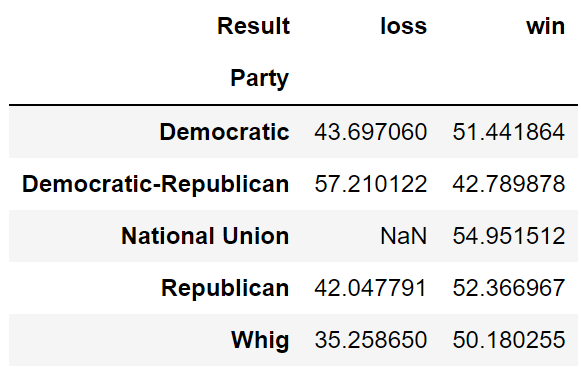

1) `pd.pivot_table(data=winners_only, index='Party', columns='Result', values='%', aggfunc=np.mean)`

2) `winners_only.groupby(['Party', 'Result'])['%'].mean()`

3) `pd.pivot_table(data=winners_only, index='Result', columns='Party', values='%', aggfunc=np.mean)`

4) `winners_only.groupby('%')[['Party', 'Result']].mean()`

**SOLUTION:**
1

### Question 1b

Consider the output of the `groupby.sum()` call below. Note that the resulting DataFrame is multi-indexed.

In [7]:
name_counts_since_1940 = babynames[babynames["Year"] >= 1940].groupby(["Name", "Year"]).sum()
name_counts_since_1940.head(9)

Count
Name  Year       
Aadan 2008      7
      2009      6
      2014      5
Aaden 2007     20
      2008    135
      2009    158
      2010     62
      2011     39
      2012     38

Multi-indexed DataFrames can be a little confusing at first, but the ideas for using loc generalize pretty naturally. Examples below:

In [8]:
name_counts_since_1940.loc['Aaiden':'Aakash']

Count
Name   Year       
Aaiden 2009     11
       2010     11
       2011      8
       2013     13
       2014     12
       2015     13
       2016     12
       2017     12
Aaira  2018      6
Aairah 2017      5
Aakash 1991      5
       1992      9
       1994     10
       1995      6
       1997      5
       1998      8
       2000      6
       2001      7
       2002      9
       2003     12
       2004      8
       2006      5
       2007      7
       2008      5
       2009      8
       2010      6
       2011      8
       2012      8
       2013      6
       2014      8

In [9]:
#Use both indices
name_counts_since_1940.loc[("Aaiden", 2011):("Aakash", 2000)]

Count
Name   Year       
Aaiden 2011      8
       2013     13
       2014     12
       2015     13
       2016     12
       2017     12
Aaira  2018      6
Aairah 2017      5
Aakash 1991      5
       1992      9
       1994     10
       1995      6
       1997      5
       1998      8
       2000      6

Using `name_counts_since_1940`, set `imani_2013_count` equal to the number of babies born with the name 'Imani' in the year 2013. You may use either `.loc`. or `.query`. Make sure you're returning a value and not a Series or DataFrame

In [16]:
imani_2013_count = name_counts_since_1940.loc[("Imani", 2013), 'Count']
imani_2013_count

47

Note: Sometimes it's just useful to throw away the index and go back to having arbitrary numbers as an index. To do this, we use `reset_index()`.

In [24]:
name_counts_since_1940_numerical_index = name_counts_since_1940.reset_index()
name_counts_since_1940_numerical_index.head(10)

,Name,Year,Count
0,Aadan,2008,7
1,Aadan,2009,6
2,Aadan,2014,5
3,Aaden,2007,20
4,Aaden,2008,135
5,Aaden,2009,158
6,Aaden,2010,62
7,Aaden,2011,39
8,Aaden,2012,38
9,Aaden,2013,29


### Question 2: String Operations and Table Joining

Create a new DataFrame called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

Hint: Use `.str.split`.

In [28]:
elections_with_first_name = elections.copy()
elections_with_first_name["First Name"] = elections["Candidate"].str.split(" ").str[0]
elections_with_first_name.head(10)

,Year,Candidate,Party,Popular vote,Result,%,First Name
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,John
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,Andrew
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,John
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,Andrew
5,1832,Henry Clay,National Republican,484205,loss,37.603628,Henry
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583,William
7,1836,Hugh Lawson White,Whig,146109,loss,10.005985,Hugh
8,1836,Martin Van Buren,Democratic,763291,win,52.272472,Martin
9,1836,William Henry Harrison,Whig,550816,loss,37.721543,William


By default `pd.merge` will only join on values that are common to both of the tables we are merging (inner join). Below is an example of joining `elections_with_first_name` with `name_counts_since_1940_numerical_index` only on the first names.

In [26]:
elections_and_names_by_name = pd.merge(elections_with_first_name, name_counts_since_1940_numerical_index, left_on='First Name', right_on='Name')
elections_and_names_by_name.head(10)

,Year_x,Candidate,Party,Popular vote,Result,%,First Name,Name,Year_y,Count
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1940,87
1,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1941,116
2,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1942,139
3,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1943,140
4,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1944,155
5,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1945,164
6,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1946,236
7,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1947,253
8,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1948,266
9,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,Andrew,1949,289


Now create `elections_and_names` by joining the `elections_with_first_name` table with `name_counts_since_1940_numerical_index` on both the first names of each person along and the year.

In [10]:
elections_and_names = pd.merge(elections_with_first_name, name_counts_since_1940_numerical_index, left_on=['First Name', 'Year'], right_on=['Name', 'Year'])
elections_and_names.head(10)

,Year,Candidate,Party,Popular vote,Result,%,First Name,Name,Count
0,1940,Franklin Roosevelt,Democratic,27313945,win,54.871202,Franklin,Franklin,48
1,1940,Norman Thomas,Socialist,116599,loss,0.234237,Norman,Norman,259
2,1940,Wendell Willkie,Republican,22347744,loss,44.894561,Wendell,Wendell,25
3,1944,Franklin Roosevelt,Democratic,25612916,win,53.773801,Franklin,Franklin,54
4,1944,Thomas E. Dewey,Republican,22017929,loss,46.226199,Thomas,Thomas,1562
5,1948,Claude A. Watson,Prohibition,103708,loss,0.212747,Claude,Claude,67
6,1948,Harry Truman,Democratic,24179347,win,49.601536,Harry,Harry,293
7,1948,Henry A. Wallace,Progressive,1157328,loss,2.374144,Henry,Henry,421
8,1948,Norman Thomas,Socialist,139569,loss,0.286312,Norman,Norman,247
9,1948,Thomas E. Dewey,Republican,21991292,loss,45.112958,Thomas,Thomas,2332


Below we make a crude plot of election winners and losers. According to this plot, since the 1970s, we haven't had a president with a name that was highly common in the year he was elected. 

Note that our data is a bit messy since, for example, Bill Clinton's name in the data set is "Bill", when in fact his legal name is William.

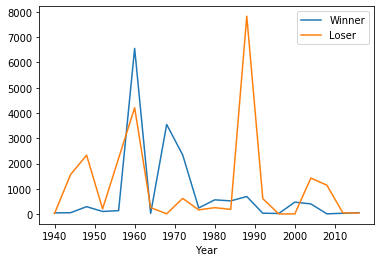

In [11]:
elections_and_names.query("Result == 'win'").set_index("Year")["Count"].plot()
elections_and_names.query("Result == 'loss'").sort_values("%").groupby("Year")['Count'].last().plot()
plt.legend(["Winner", "Loser"]);